# Requirements

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [3]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

Preprocess the input and the output variables appropriately.

In [4]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

Explore the dataset using visualizations of your choice.

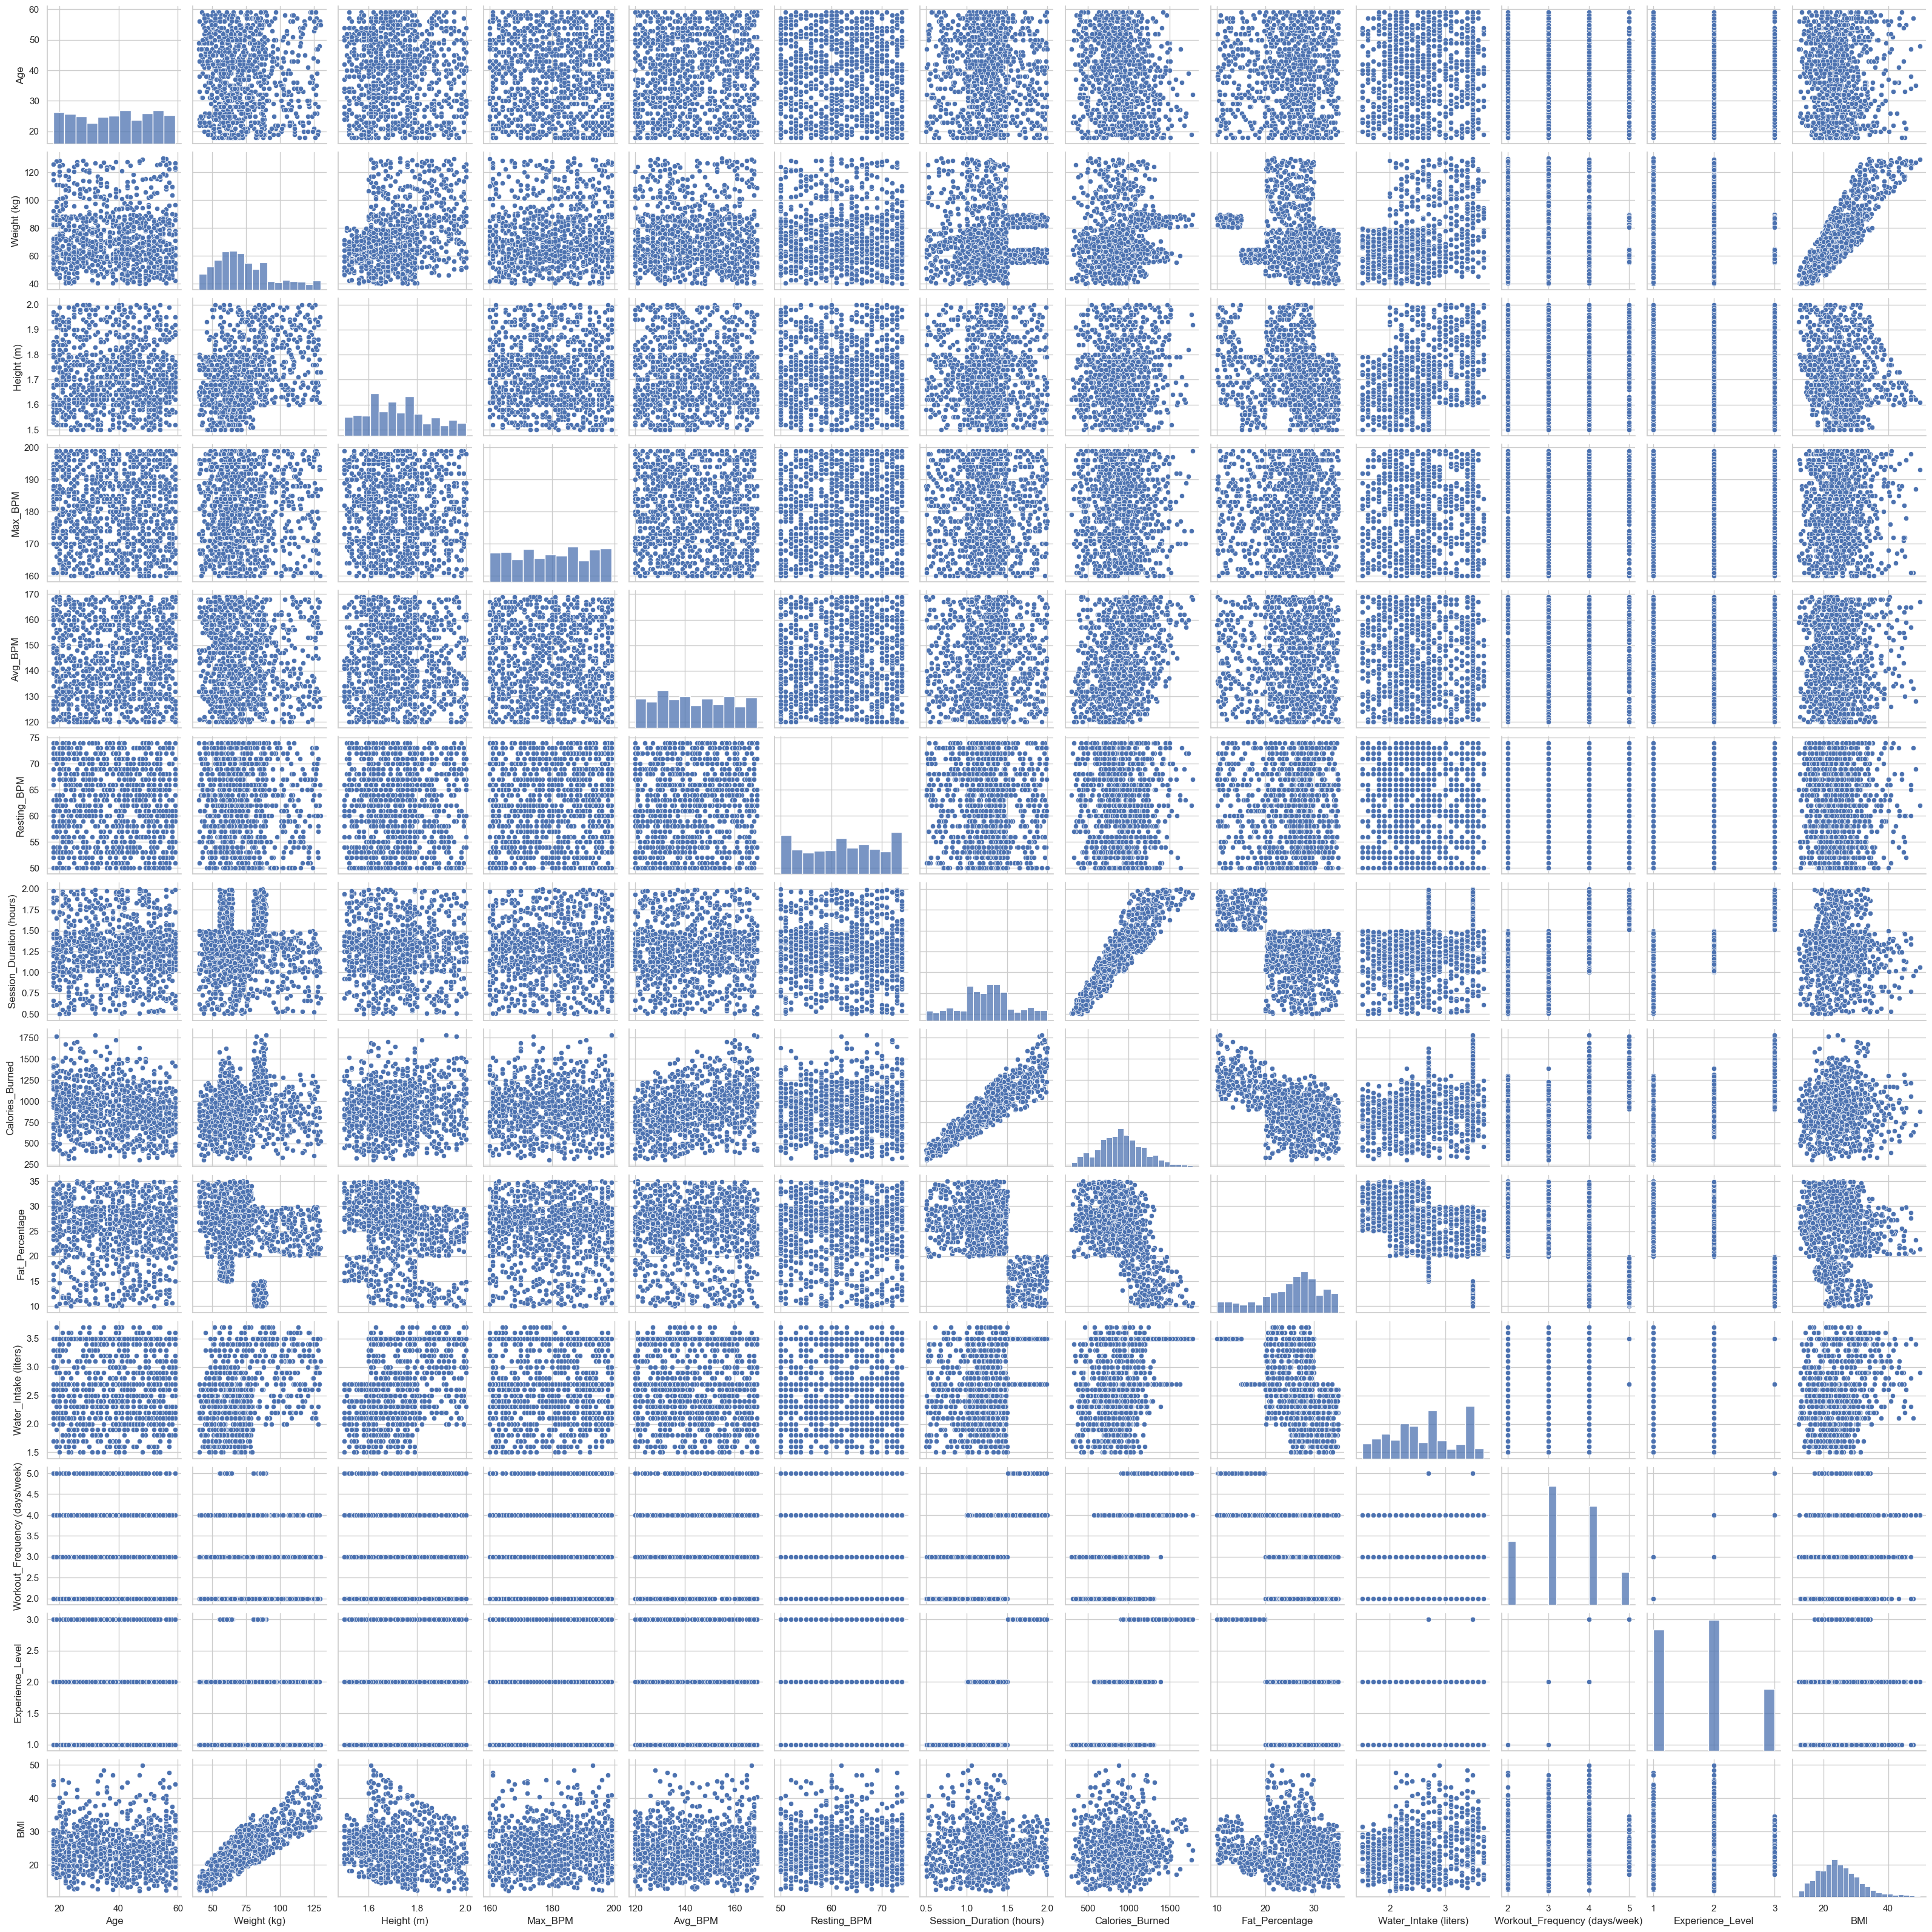

In [8]:
sns.set_theme(style="whitegrid")
sns.pairplot(df)
plt.show()

Check if the dataset is balanced.

<Axes: ylabel='Frequency'>

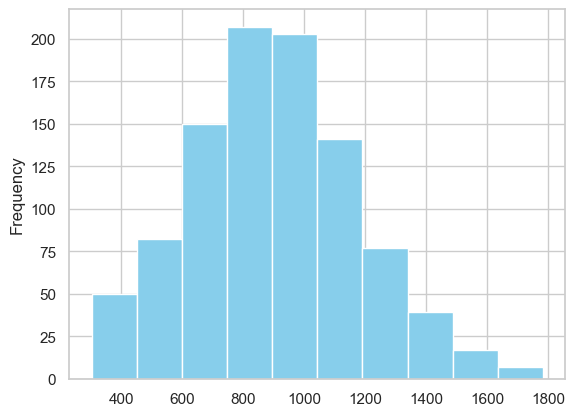

In [41]:
df['Calories_Burned'].plot(kind='hist', color='skyblue')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [43]:
missing = df.isnull().sum() / len(df) * 100
missing = missing.reset_index().rename(columns={"index": "column", 0:"percent_missing"})
missing

column  percent_missing
0                             Age              0.0
1                          Gender              0.0
2                     Weight (kg)              0.0
3                      Height (m)              0.0
4                         Max_BPM              0.0
5                         Avg_BPM              0.0
6                     Resting_BPM              0.0
7        Session_Duration (hours)              0.0
8                 Calories_Burned              0.0
9                    Workout_Type              0.0
10                 Fat_Percentage              0.0
11          Water_Intake (liters)              0.0
12  Workout_Frequency (days/week)              0.0
13               Experience_Level              0.0
14                            BMI              0.0

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


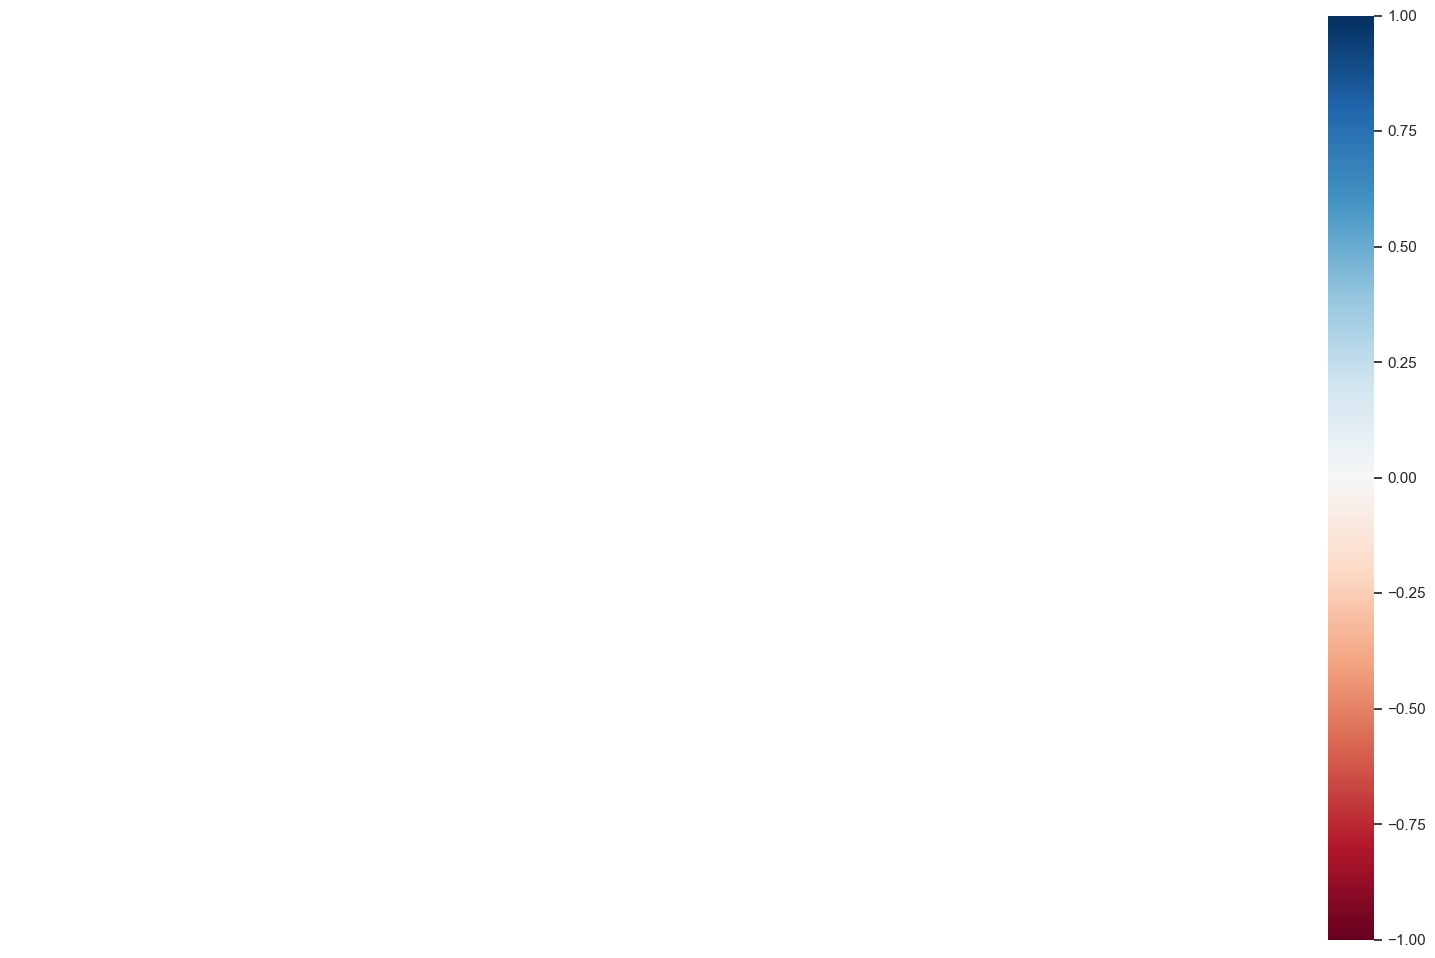

In [20]:
msno.heatmap(df)
plt.show()

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


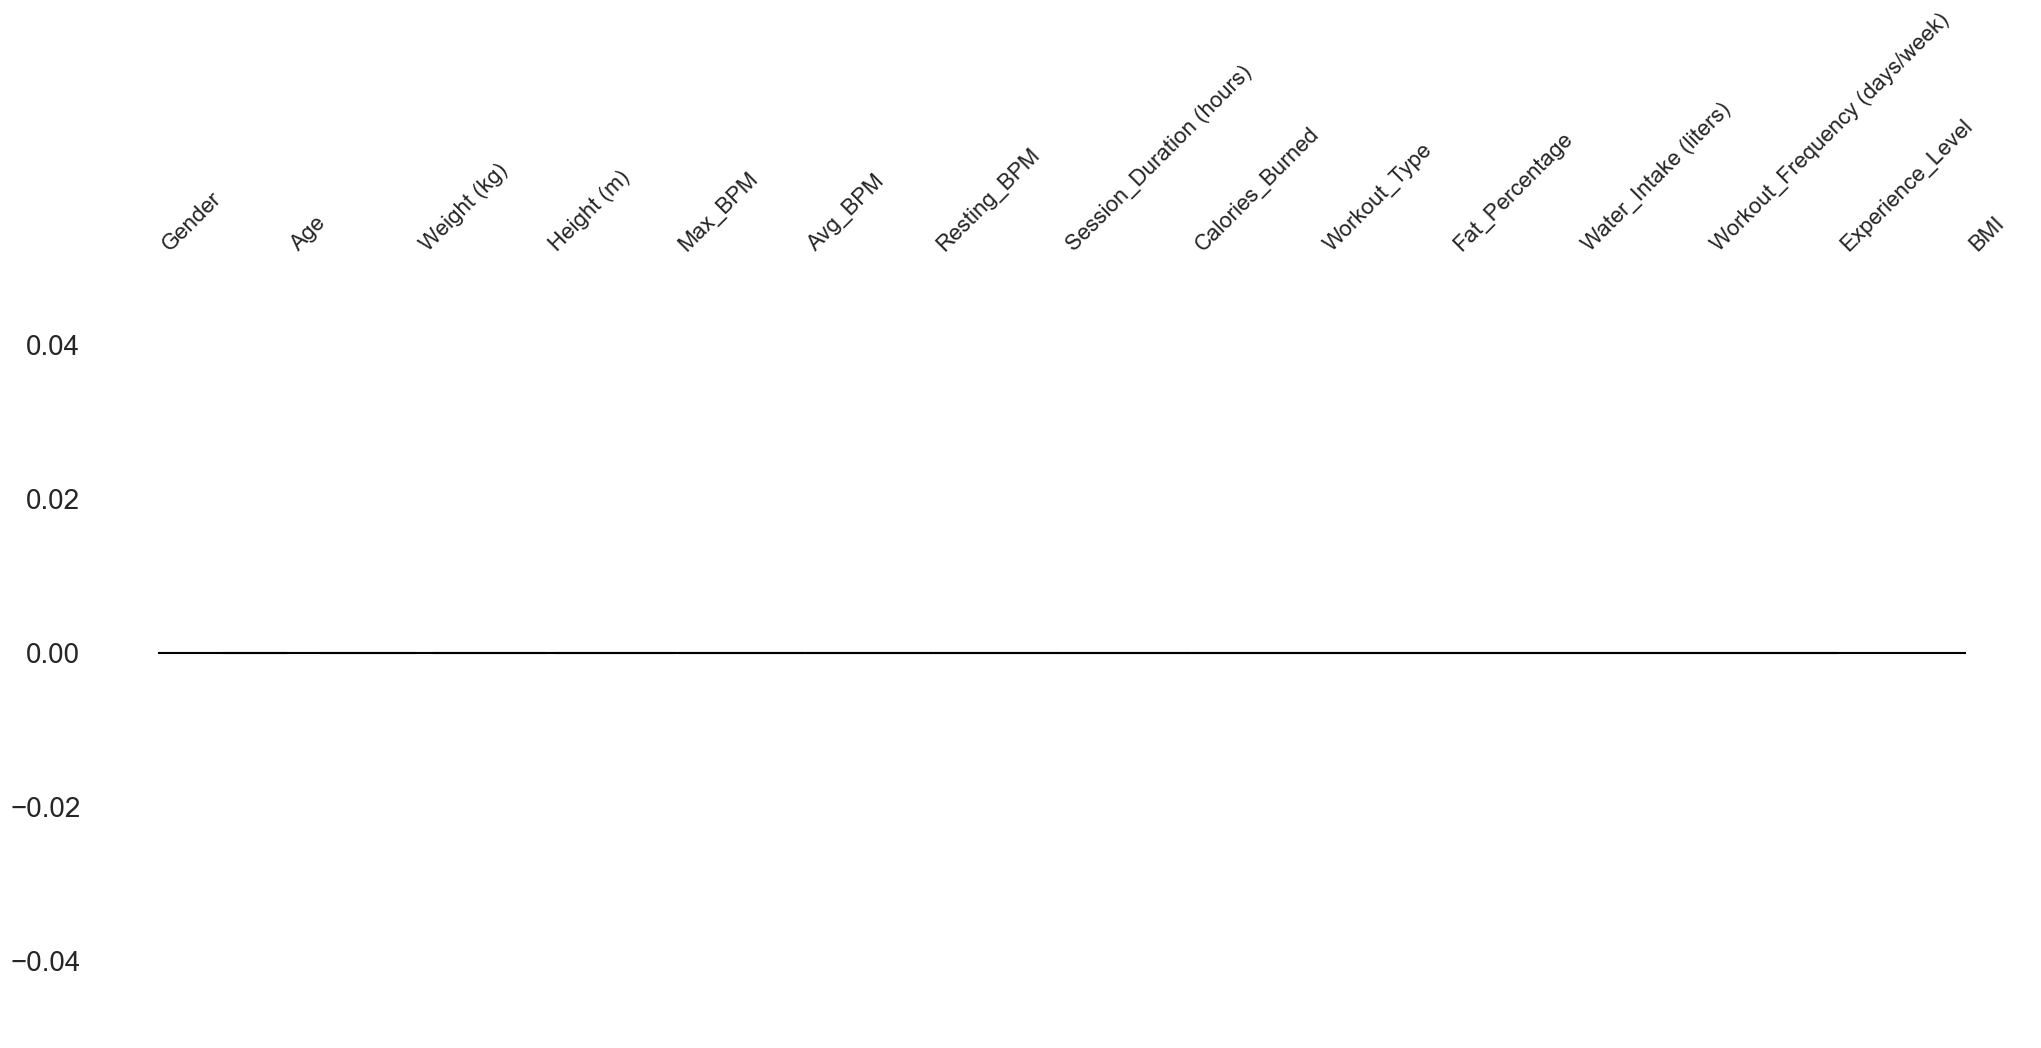

In [21]:
msno.dendrogram(df)
plt.show()

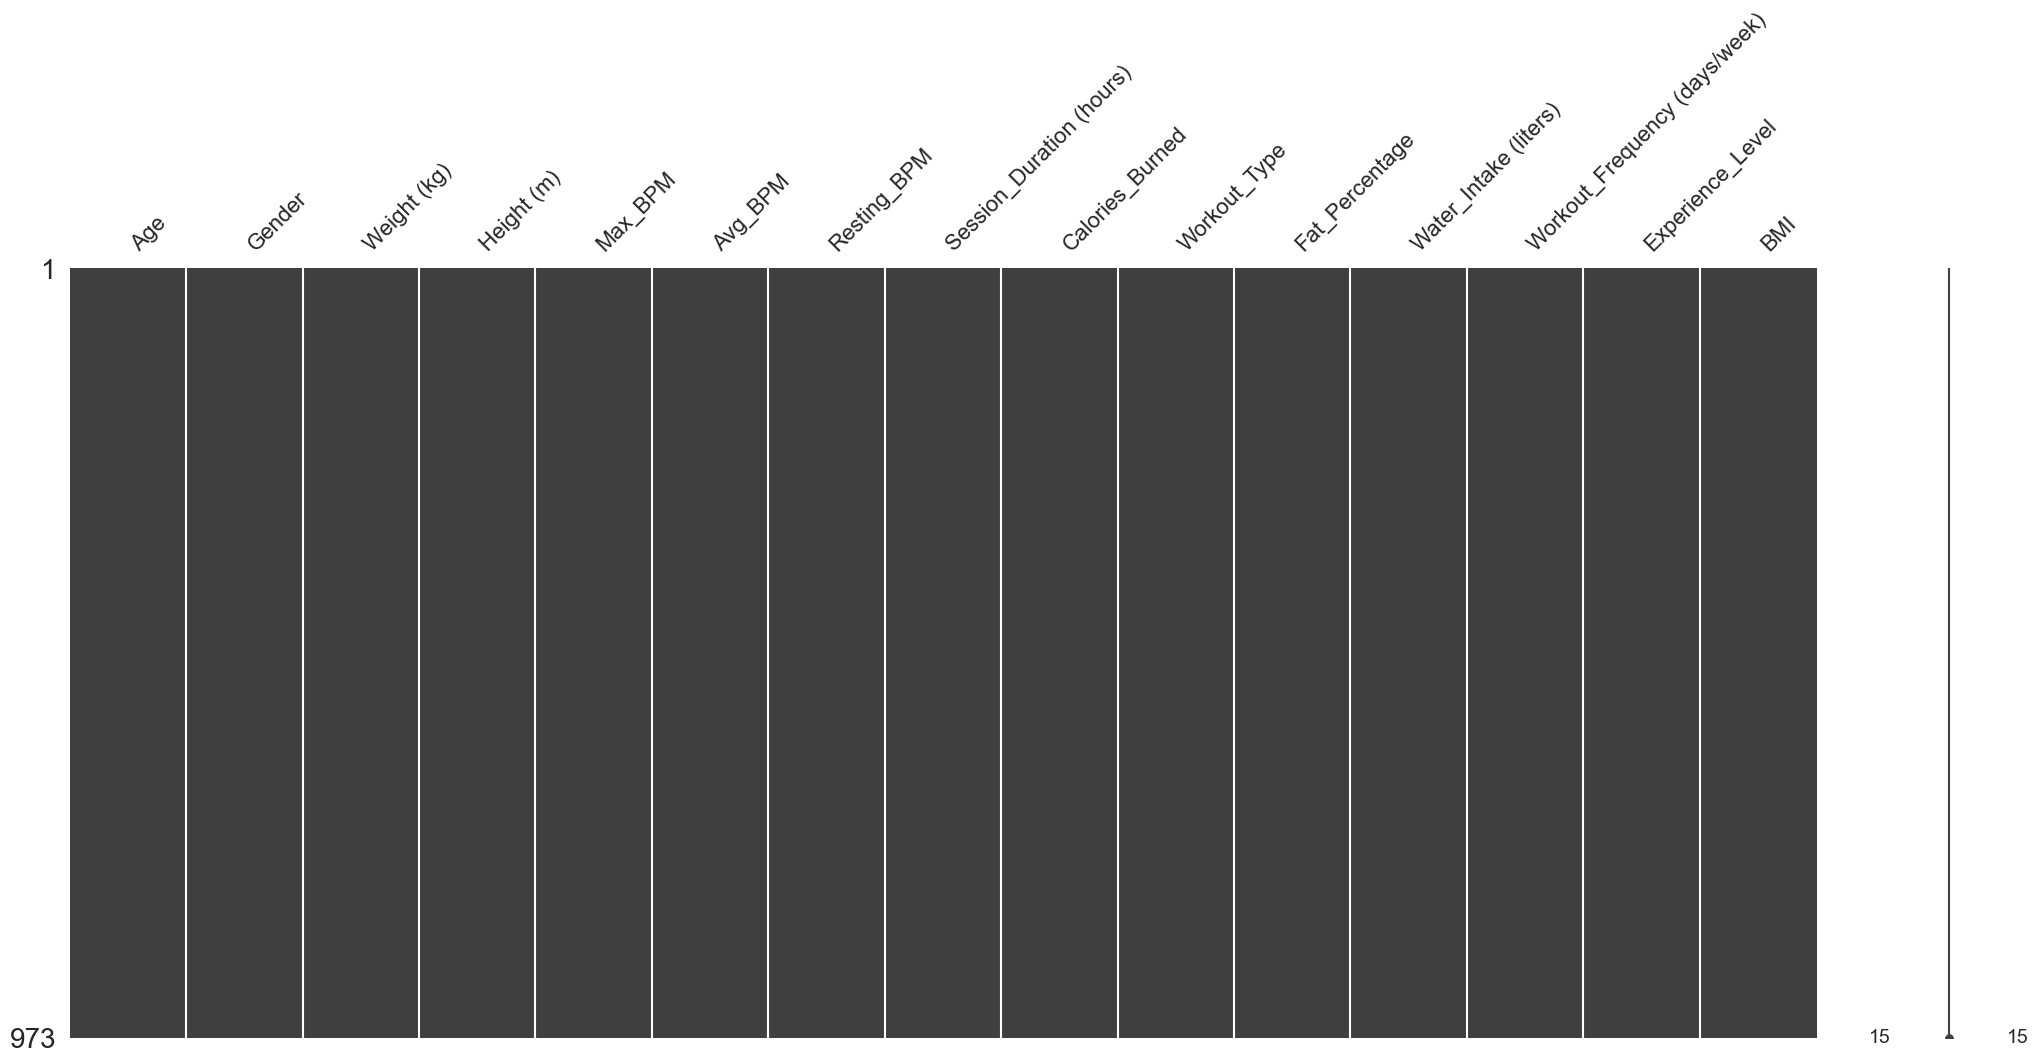

In [22]:
msno.matrix(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Workout_Type'] = encoder.fit_transform(df['Workout_Type'])

x = df.drop('Calories_Burned', axis=1)
y = df['Calories_Burned']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [50]:
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Model Selection

Choose and train an approriate model for the given task.

In [57]:
classifier = LinearRegression()
classifier.fit(train_x, train_y)

LinearRegression()

Use the trained model to make predictions for the test set.

In [58]:
prediction = classifier.predict(test_x)

Assess the performance of the model by using different classification metrics.

In [56]:
classifier.score(test_x, test_y)

0.9803427065691752

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [59]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [65]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

classifier = LinearRegression()

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [67]:
exp_values = {'n_jobs': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(classifier, exp_values, cv=2)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [70]:
best_regression = grid_search.best_estimator_
print(f"Best n_jobs: {grid_search.best_params_['n_jobs']}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best n_jobs: 1
Best cross-validation score: 0.9771581604541774


In [72]:
test_score = best_regression.score(test_x, test_y)
print(f"Test set score: {test_score}")

Test set score: 0.9822790905741037
